<a href="https://www.kaggle.com/code/sagorkumarmitra/dimensionality-reduction-17-to-4-with-autoencoder?scriptVersionId=145299736" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/uk-food-habits/UK_foods.csv',index_col='Unnamed: 0')

# Preprocessing & Visulaization

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<Axes: >

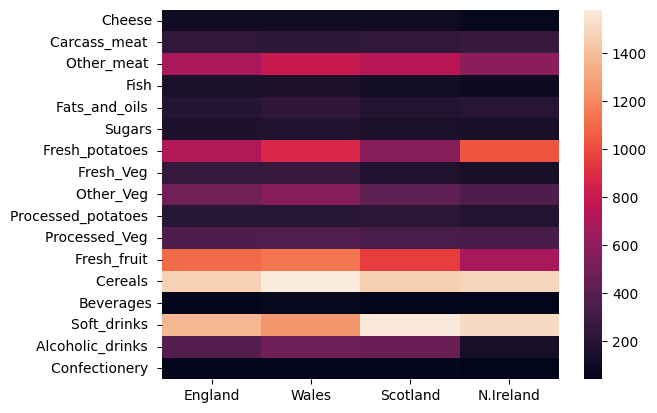

In [5]:
sns.heatmap(df)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Encoder

In [7]:
encoder=Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

# Decoder

In [8]:
decoder=Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [9]:
autoencoder=Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df.transpose().values)

In [11]:
scaled_df.shape

(4, 17)

# Train Autoencoder

In [12]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 777ms/step - loss: 0.3766
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3753
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3740
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3728
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3715
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3703
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3690
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3678
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3665
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3653
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3641
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3628
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 

In [13]:
encoded_2dim=encoder.predict(scaled_df)

1/1 [==============================] - 0s 95ms/step


In [14]:
encoded_2dim.shape

(4, 2)

In [15]:
encoded_2dim

array([[1.3493465 , 0.        ],
       [1.4838259 , 0.        ],
       [1.223943  , 0.        ],
       [0.25060567, 0.        ]], dtype=float32)

# Join 2D data with original dataset

In [16]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [17]:
results=pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                    columns=['C1','C2'])

In [18]:
results

,C1,C2
England,1.349347,0.0
Wales,1.483826,0.0
Scotland,1.223943,0.0
N.Ireland,0.250606,0.0


In [19]:
results=results.reset_index()

In [20]:
results

,index,C1,C2
0,England,1.349347,0.0
1,Wales,1.483826,0.0
2,Scotland,1.223943,0.0
3,N.Ireland,0.250606,0.0


# Final Findings

<Axes: xlabel='C1', ylabel='C2'>

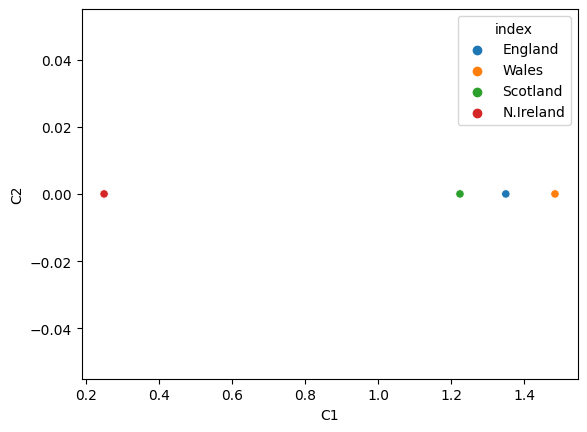

In [21]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')